# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import codes as cd

In [2]:
#cd.pd.set_option('display.max_columns', None)
#cd.pd.set_option('display.max_rows', None)
#cd.pd.options.display.float_format = '{:.2f}'.format

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_1 = cd.pd.read_csv('df_train.csv') # load the train data
df_2 = cd.pd.read_csv('df_test.csv') # load the test data

> Make a copy of the dataset

In [4]:
df_train = df_1.copy() # Copy of the train data
df_test = df_2.copy() # Copy of the test data

In [5]:
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
df_train.head()

,unnamed: 0,time,madrid_wind_speed,valencia_wind_deg,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,...,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
df_train.shape

(8763, 49)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   madrid_wind_speed     8763 non-null   float64
 3   valencia_wind_deg     8763 non-null   object 
 4   bilbao_rain_1h        8763 non-null   float64
 5   valencia_wind_speed   8763 non-null   float64
 6   seville_humidity      8763 non-null   float64
 7   madrid_humidity       8763 non-null   float64
 8   bilbao_clouds_all     8763 non-null   float64
 9   bilbao_wind_speed     8763 non-null   float64
 10  seville_clouds_all    8763 non-null   float64
 11  bilbao_wind_deg       8763 non-null   float64
 12  barcelona_wind_speed  8763 non-null   float64
 13  barcelona_wind_deg    8763 non-null   float64
 14  madrid_clouds_all     8763 non-null   float64
 15  seville_wind_speed   

In [9]:
df_train.describe()

,unnamed: 0,madrid_wind_speed,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,seville_clouds_all,bilbao_wind_deg,...,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [10]:
df_train.isnull().sum()

unnamed: 0                 0
time                       0
madrid_wind_speed          0
valencia_wind_deg          0
bilbao_rain_1h             0
valencia_wind_speed        0
seville_humidity           0
madrid_humidity            0
bilbao_clouds_all          0
bilbao_wind_speed          0
seville_clouds_all         0
bilbao_wind_deg            0
barcelona_wind_speed       0
barcelona_wind_deg         0
madrid_clouds_all          0
seville_wind_speed         0
barcelona_rain_1h          0
seville_pressure           0
seville_rain_1h            0
bilbao_snow_3h             0
barcelona_pressure         0
seville_rain_3h            0
madrid_rain_1h             0
barcelona_rain_3h          0
valencia_snow_3h           0
madrid_weather_id          0
barcelona_weather_id       0
bilbao_pressure            0
seville_weather_id         0
valencia_pressure       2068
seville_temp_max           0
madrid_pressure            0
valencia_temp_max          0
valencia_temp              0
bilbao_weather

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_train.dtypes

unnamed: 0                int64
time                     object
madrid_wind_speed       float64
valencia_wind_deg        object
bilbao_rain_1h          float64
valencia_wind_speed     float64
seville_humidity        float64
madrid_humidity         float64
bilbao_clouds_all       float64
bilbao_wind_speed       float64
seville_clouds_all      float64
bilbao_wind_deg         float64
barcelona_wind_speed    float64
barcelona_wind_deg      float64
madrid_clouds_all       float64
seville_wind_speed      float64
barcelona_rain_1h       float64
seville_pressure         object
seville_rain_1h         float64
bilbao_snow_3h          float64
barcelona_pressure      float64
seville_rain_3h         float64
madrid_rain_1h          float64
barcelona_rain_3h       float64
valencia_snow_3h        float64
madrid_weather_id       float64
barcelona_weather_id    float64
bilbao_pressure         float64
seville_weather_id      float64
valencia_pressure       float64
seville_temp_max        float64
madrid_p

In [13]:
df_test.head()

,unnamed: 0,time,madrid_wind_speed,valencia_wind_deg,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,...,barcelona_temp_max,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [14]:
df_test.shape

(2920, 48)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   madrid_wind_speed     2920 non-null   float64
 3   valencia_wind_deg     2920 non-null   object 
 4   bilbao_rain_1h        2920 non-null   float64
 5   valencia_wind_speed   2920 non-null   float64
 6   seville_humidity      2920 non-null   float64
 7   madrid_humidity       2920 non-null   float64
 8   bilbao_clouds_all     2920 non-null   float64
 9   bilbao_wind_speed     2920 non-null   float64
 10  seville_clouds_all    2920 non-null   float64
 11  bilbao_wind_deg       2920 non-null   float64
 12  barcelona_wind_speed  2920 non-null   float64
 13  barcelona_wind_deg    2920 non-null   float64
 14  madrid_clouds_all     2920 non-null   float64
 15  seville_wind_speed   

In [16]:
df_test.describe()

,unnamed: 0,madrid_wind_speed,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,seville_clouds_all,bilbao_wind_deg,...,barcelona_temp_max,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [17]:
df_test.isnull().sum()

unnamed: 0                0
time                      0
madrid_wind_speed         0
valencia_wind_deg         0
bilbao_rain_1h            0
valencia_wind_speed       0
seville_humidity          0
madrid_humidity           0
bilbao_clouds_all         0
bilbao_wind_speed         0
seville_clouds_all        0
bilbao_wind_deg           0
barcelona_wind_speed      0
barcelona_wind_deg        0
madrid_clouds_all         0
seville_wind_speed        0
barcelona_rain_1h         0
seville_pressure          0
seville_rain_1h           0
bilbao_snow_3h            0
barcelona_pressure        0
seville_rain_3h           0
madrid_rain_1h            0
barcelona_rain_3h         0
valencia_snow_3h          0
madrid_weather_id         0
barcelona_weather_id      0
bilbao_pressure           0
seville_weather_id        0
valencia_pressure       454
seville_temp_max          0
madrid_pressure           0
valencia_temp_max         0
valencia_temp             0
bilbao_weather_id         0
seville_temp        

In [18]:
df_test.duplicated().sum()

0

> ** NOTES FROM ASSESSMENTS OF THE TRAIN DATA SET**
>1. Time columns has a wrong data type (Object instead of Date Time)
>2. Rename all columns to lower case
>3. Drop the unnamed column since it corresponds with the index
>4. Valencia pressure column has Null values.
>5. Reformat barcelona pressure column numbers to show exponents
>6. Irrelevant 'unnamed' column which is the same with index.
>7. Every feature that is wind degree should be categorical data with values ranging from 0 to 360 and category levels 1 to 10.
>8. Assessment indicates the presence of an anomaly with the rainfall levels of barcelona in the train dataset. (high rainfall level and there wasn't any rain that day as determined from online records) 
>9. Assessment indicates the presence of an anomaly with the windspeed for valencia.(max speed 52 is too high, other cities had a maximum wind speed of 12, normal windspeed levels fall between the ranges of 10 to 19 on average)
>10. There are no percentiles for rain_1h
>11. There are no percentiles for rain_3h

### split the data according to variables measured to compare all records

In [213]:
wind_speed_train = df_train[[x for x in df_train.columns if 'wind_speed' in x]]

In [20]:
wind_speed_test = df_test[[x for x in df_test.columns if 'wind_speed' in x]]

In [215]:
wind_degree_train = df_train[[x for x in df_train.columns if 'wind_deg' in x]]

""


In [22]:
wind_degree_test = df_test[[x for x in df_test.columns if 'wind_deg' in x]]

In [217]:
rain_1h_train = df_train[[x for x in df_train.columns if 'rain_1h' in x]]

In [24]:
rain_1h_test = df_test[[x for x in df_test.columns if 'rain_1h' in x]]

In [219]:
rain_3h_train = df_train[[x for x in df_train.columns if 'rain_3h' in x]]

In [26]:
rain_3h_test = df_test[[x for x in df_test.columns if 'rain_3h' in x]]

In [221]:
humidity_train = df_train[[x for x in df_train.columns if 'humidity' in x]]

In [28]:
humidity_test = df_test[[x for x in df_test.columns if 'humidity' in x]]

In [222]:
clouds_all_train = df_train[[x for x in df_train.columns if 'clouds_all' in x]]

,bilbao_clouds_all,seville_clouds_all,madrid_clouds_all
bilbao_clouds_all,1.000000,0.047732,0.108725
seville_clouds_all,0.047732,1.000000,0.570346
madrid_clouds_all,0.108725,0.570346,1.000000


In [30]:
clouds_all_test = df_test[[x for x in df_test.columns if 'clouds_all' in x]]

In [31]:
pressure_train = df_train[[x for x in df_train.columns if 'pressure' in x]]

In [32]:
pressure_test = df_test[[x for x in df_test.columns if 'pressure' in x]]

In [33]:
snow_3h_train = df_train[[x for x in df_train.columns if 'snow_3h' in x]]

In [34]:
snow_3h_test = df_test[[x for x in df_test.columns if 'snow_3h' in x]]

In [35]:
weather_id_train = df_train[[x for x in df_train.columns if 'weather_id' in x]]

In [36]:
weather_id_test = df_test[[x for x in df_test.columns if 'weather_id' in x]]

In [224]:
temp_max_train = df_train[[x for x in df_train.columns if 'temp_max' in x]]

In [38]:
temp_max_test = df_test[[x for x in df_test.columns if 'temp_max' in x]]

In [39]:
temp_train = df_train[[x for x in df_train.columns if "temp" in x and 'max' not in x and 'min' not in x]]

In [40]:
temp_test = df_test[[x for x in df_test.columns if "temp" in x and 'max' not in x and 'min' not in x]]

In [41]:
temp_min_train = df_train[[x for x in df_train.columns if 'temp_min' in x]]

In [42]:
temp_min_test = df_test[[x for x in df_test.columns if 'temp_min' in x]]

In [43]:
temp_test = df_test[[x for x in df_test.columns if 'temp' in x]]

In [44]:
df_train.select_dtypes(include=[object]).columns.sort_values()

Index(['seville_pressure', 'time', 'valencia_wind_deg'], dtype='object')

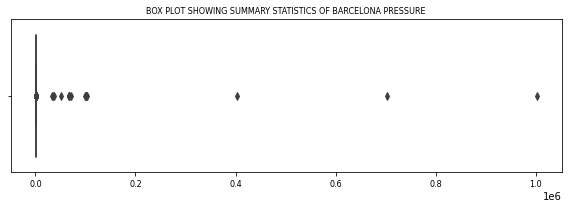

In [45]:
cd.plot_boxplot(df_train, x_axis = 'barcelona_pressure', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of barcelona pressure", tick_fontsize = 8)

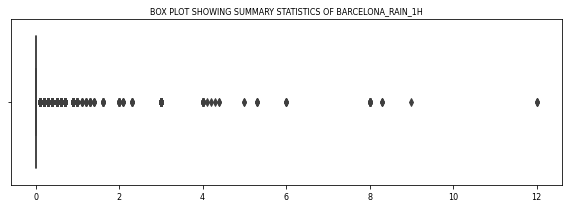

In [46]:
cd.plot_boxplot(df_train, x_axis = 'barcelona_rain_1h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of barcelona_rain_1h", tick_fontsize = 8)

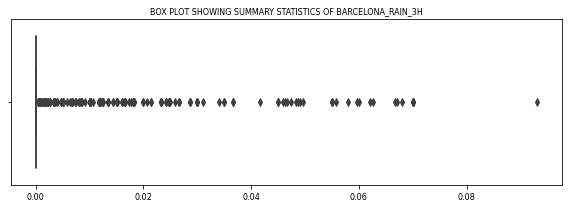

In [47]:
cd.plot_boxplot(df_train, x_axis = 'barcelona_rain_3h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of barcelona_rain_3h", tick_fontsize = 8)

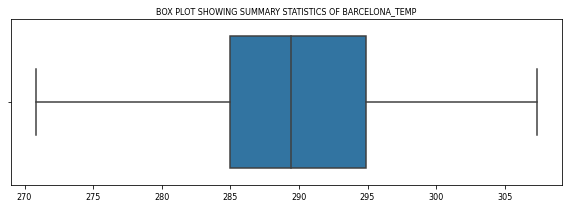

In [48]:
cd.plot_boxplot(df_train, x_axis = 'barcelona_temp', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of barcelona_temp", tick_fontsize = 8)

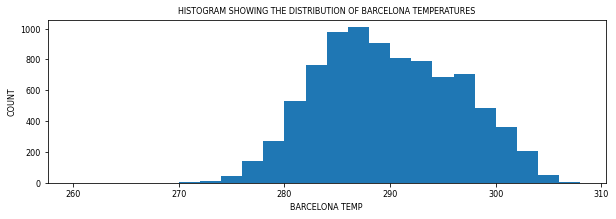

In [49]:
cd.plt_plot_hist(df_train, 'barcelona_temp', bin_num = 2, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of barcelona temperatures", x_label = 'barcelona temp', 
                 bin_edge = 260, y_label ='count')

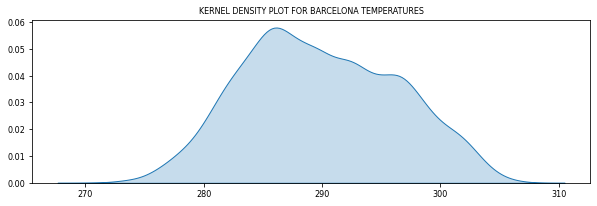

In [50]:
cd.plot_kde(df_train, x_axis = 'barcelona_temp',  plot_title = 'kernel density plot for barcelona temperatures',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

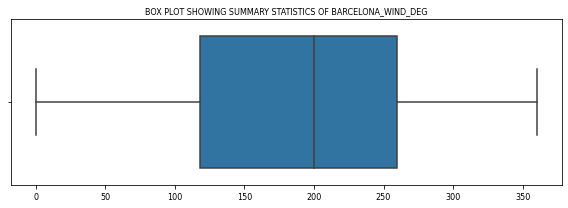

In [51]:
cd.plot_boxplot(df_train, x_axis = 'barcelona_wind_deg', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of barcelona_wind_deg", tick_fontsize = 8)

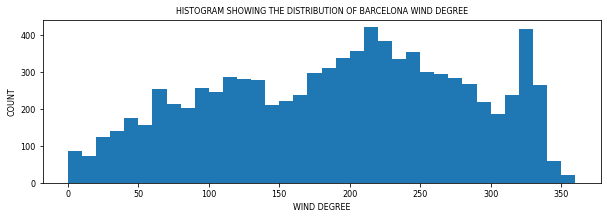

In [52]:
cd.plt_plot_hist(df_train, 'barcelona_wind_deg', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of barcelona wind degree", x_label = 'wind degree', 
                 y_label ='count')

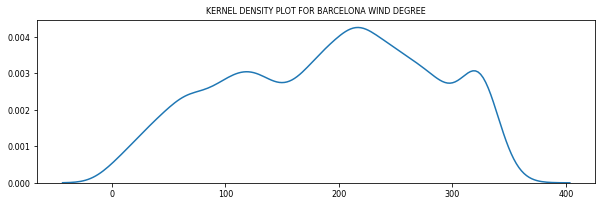

In [53]:
cd.plot_kde(df_train, x_axis = 'barcelona_wind_deg',  plot_title = 'kernel density plot for barcelona wind degree',
         should_fill = False, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

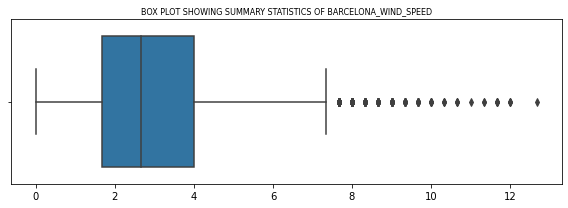

In [54]:
cd.plot_boxplot(df_train, x_axis = 'barcelona_wind_speed', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of barcelona_wind_speed", tick_fontsize = 10)

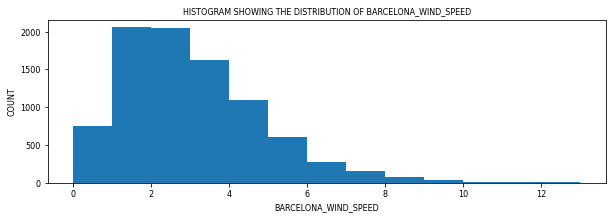

In [55]:
cd.plt_plot_hist(df_train, 'barcelona_wind_speed', bin_num = 1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of barcelona_wind_speed", x_label = 'barcelona_wind_speed', 
                 y_label ='count')

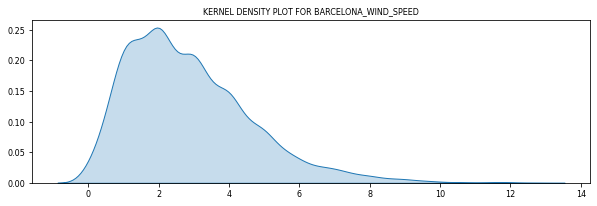

In [56]:
cd.plot_kde(df_train, x_axis = 'barcelona_wind_speed',  plot_title = 'kernel density plot for barcelona_wind_speed',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

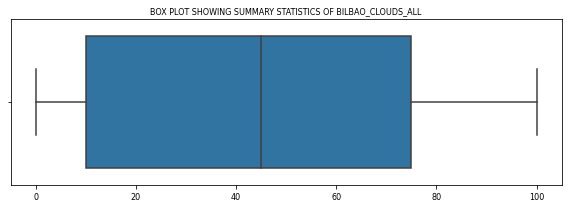

In [57]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_clouds_all', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_clouds_all", tick_fontsize = 8)

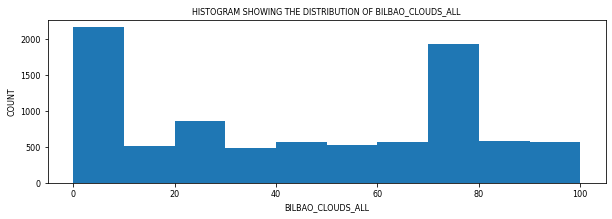

In [58]:
cd.plt_plot_hist(df_train, 'bilbao_clouds_all', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_clouds_all", x_label = 'bilbao_clouds_all', 
                 y_label ='count')

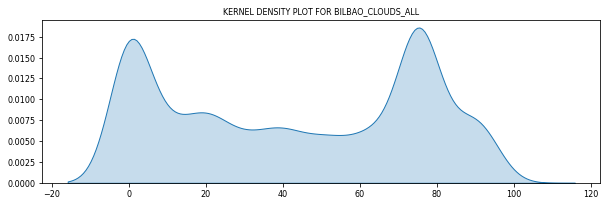

In [59]:
cd.plot_kde(df_train, x_axis = 'bilbao_clouds_all',  plot_title = 'kernel density plot for bilbao_clouds_all',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

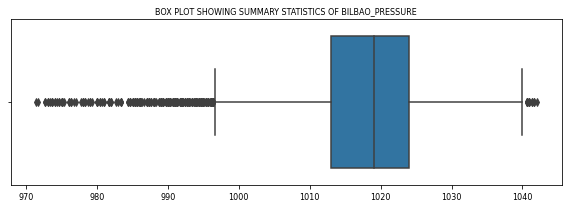

In [60]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_pressure', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_pressure", tick_fontsize = 8)

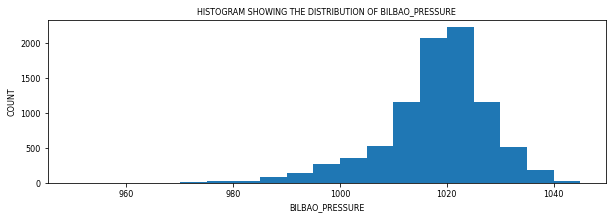

In [61]:
cd.plt_plot_hist(df_train, 'bilbao_pressure', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_pressure", x_label = 'bilbao_pressure',  
                 bin_edge = 950, y_label ='count')

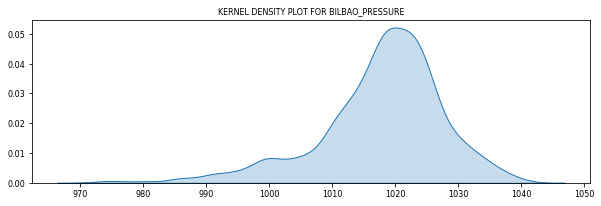

In [62]:
cd.plot_kde(df_train, x_axis = 'bilbao_pressure',  plot_title = 'kernel density plot for bilbao_pressure',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

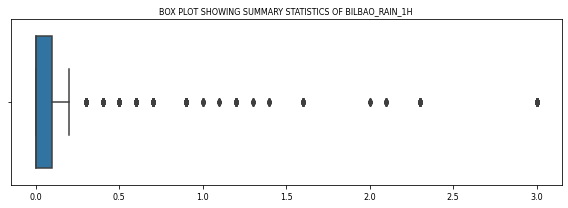

In [63]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_rain_1h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_rain_1h", tick_fontsize = 8)

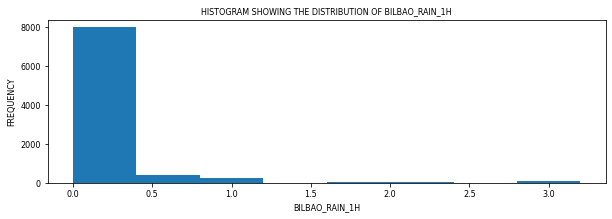

In [64]:
cd.plt_plot_hist(df_train, 'bilbao_rain_1h', bin_num = 0.4, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_rain_1h", x_label = 'bilbao_rain_1h',  
                 bin_edge = 0, y_label ='frequency')

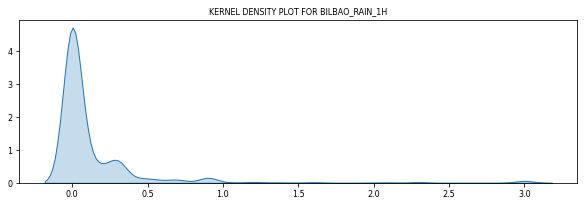

In [65]:
cd.plot_kde(df_train, x_axis = 'bilbao_rain_1h',  plot_title = 'kernel density plot for bilbao_rain_1h',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

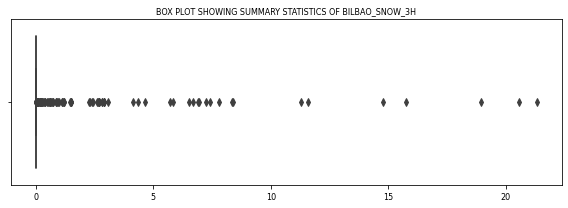

In [66]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_snow_3h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_snow_3h", tick_fontsize = 8)

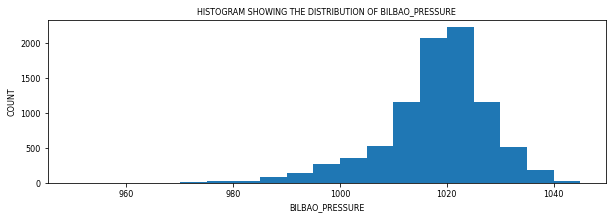

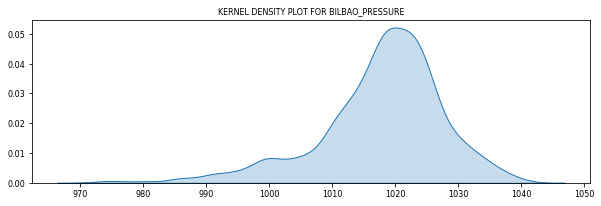

In [67]:
cd.plt_plot_hist(df_train, 'bilbao_pressure', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_pressure", x_label = 'bilbao_pressure',  
                 bin_edge = 950, y_label ='count')
cd.plot_kde(df_train, x_axis = 'bilbao_pressure',  plot_title = 'kernel density plot for bilbao_pressure',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

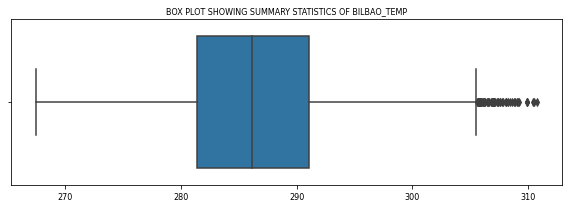

In [68]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_temp', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_temp", tick_fontsize = 8)

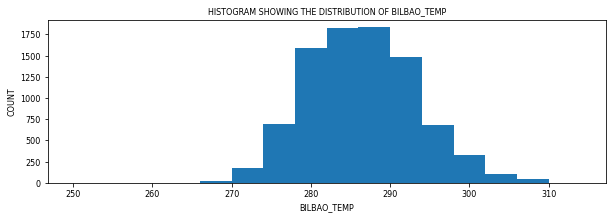

In [69]:
cd.plt_plot_hist(df_train, 'bilbao_temp', bin_num = 4, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_temp", x_label = 'bilbao_temp',  
                 bin_edge = 250, y_label ='count')

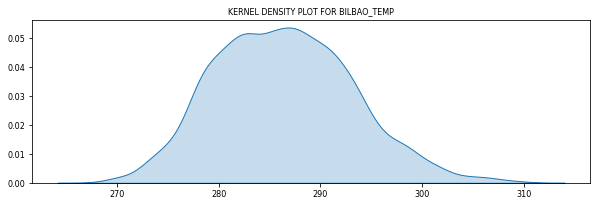

In [70]:
cd.plot_kde(df_train, x_axis = 'bilbao_temp',  plot_title = 'kernel density plot for bilbao_temp',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

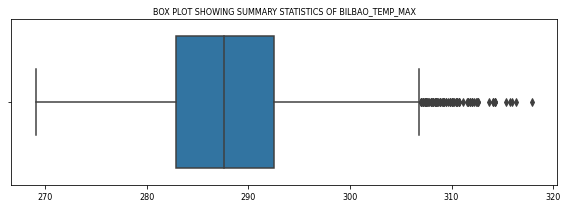

In [71]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_temp_max', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_temp_max", tick_fontsize = 8)

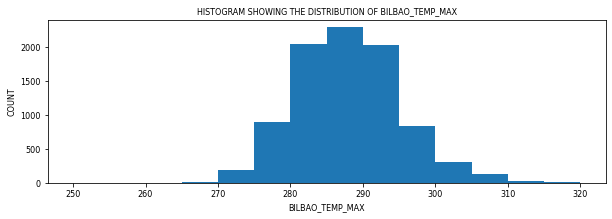

In [72]:
cd.plt_plot_hist(df_train, 'bilbao_temp_max', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_temp_max", x_label = 'bilbao_temp_max',  
                 bin_edge = 250, y_label ='count')

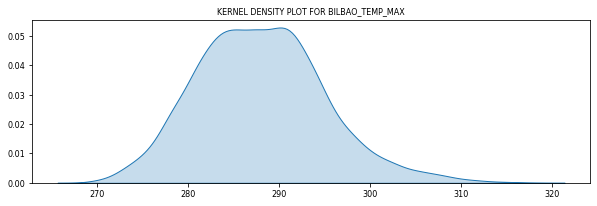

In [73]:
cd.plot_kde(df_train, x_axis = 'bilbao_temp_max',  plot_title = 'kernel density plot for bilbao_temp_max',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

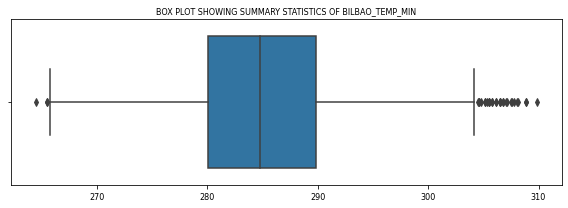

In [74]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_temp_min', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_temp_min", tick_fontsize = 8)

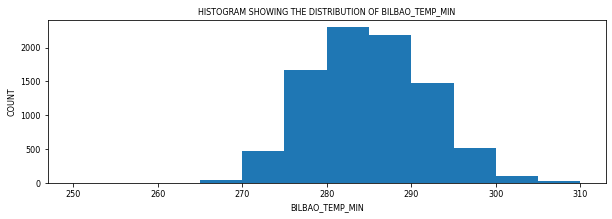

In [75]:
cd.plt_plot_hist(df_train, 'bilbao_temp_min', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_temp_min", x_label = 'bilbao_temp_min',  
                 bin_edge = 250, y_label ='count')

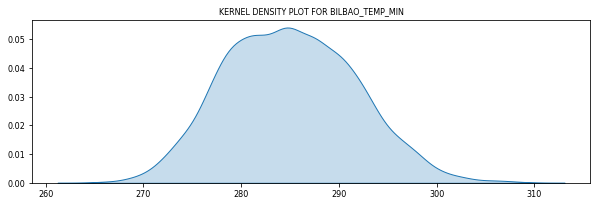

In [76]:
cd.plot_kde(df_train, x_axis = 'bilbao_temp_min',  plot_title = 'kernel density plot for bilbao_temp_min',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

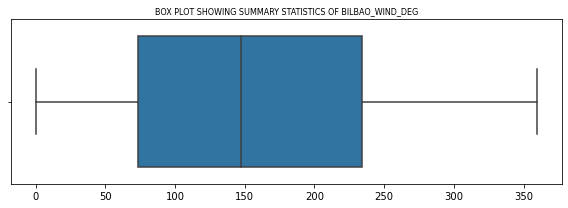

In [77]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_wind_deg', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_wind_deg", tick_fontsize = 10)

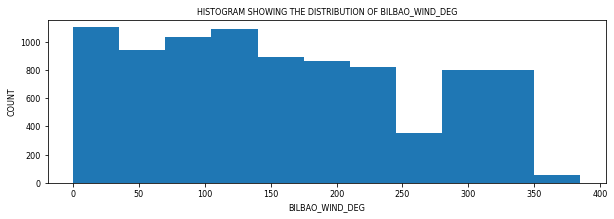

In [78]:
cd.plt_plot_hist(df_train, 'bilbao_wind_deg', bin_num = 35, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_wind_deg", x_label = 'bilbao_wind_deg',  
                 bin_edge = 0, y_label ='count')

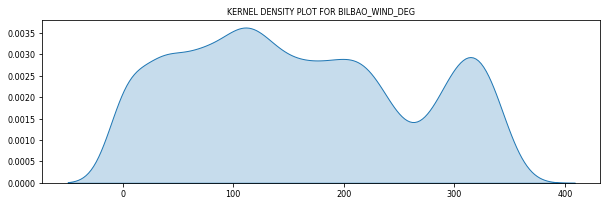

In [79]:
cd.plot_kde(df_train, x_axis = 'bilbao_wind_deg',  plot_title = 'kernel density plot for bilbao_wind_deg',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

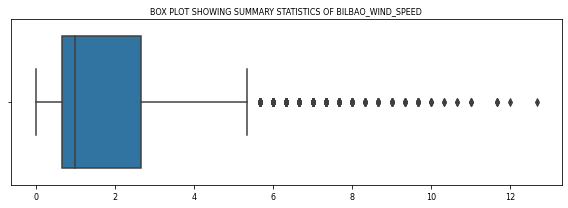

In [80]:
cd.plot_boxplot(df_train, x_axis = 'bilbao_wind_speed', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of bilbao_wind_speed", tick_fontsize = 8)

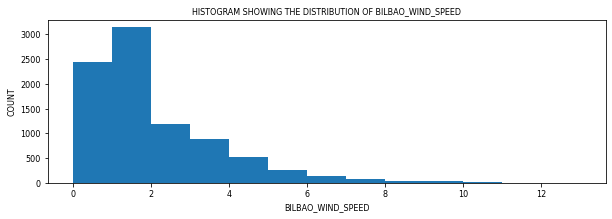

In [81]:
cd.plt_plot_hist(df_train, 'bilbao_wind_speed', bin_num = 1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_wind_speed", x_label = 'bilbao_wind_speed',  
                 bin_edge = 0, y_label ='count')

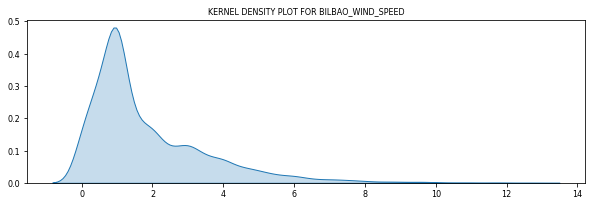

In [82]:
cd.plot_kde(df_train, x_axis = 'bilbao_wind_speed',  plot_title = 'kernel density plot for bilbao_wind_speed',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

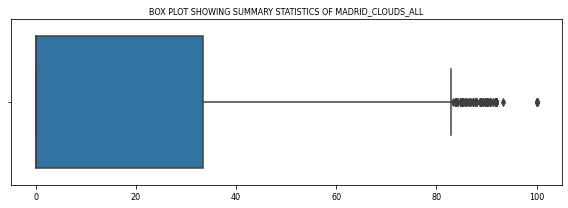

In [83]:
cd.plot_boxplot(df_train, x_axis = 'madrid_clouds_all', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_clouds_all", tick_fontsize = 8)

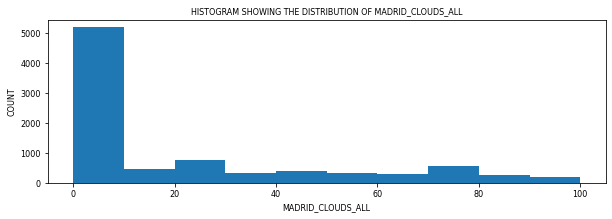

In [84]:
cd.plt_plot_hist(df_train, 'madrid_clouds_all', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_clouds_all", x_label = 'madrid_clouds_all',  
                 bin_edge = 0, y_label ='count')

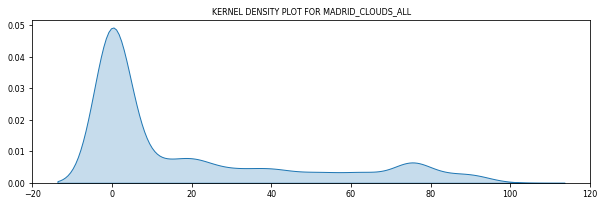

In [85]:
cd.plot_kde(df_train, x_axis = 'madrid_clouds_all',  plot_title = 'kernel density plot for madrid_clouds_all',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

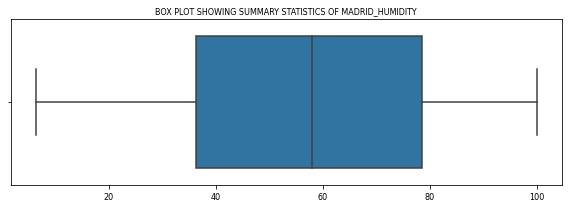

In [86]:
cd.plot_boxplot(df_train, x_axis = 'madrid_humidity', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_humidity", tick_fontsize = 8)

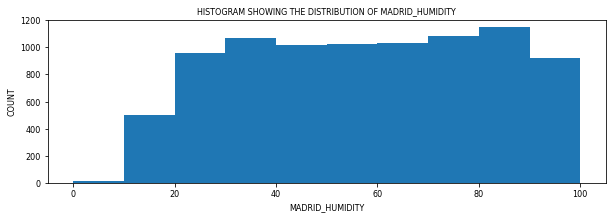

In [87]:
cd.plt_plot_hist(df_train, 'madrid_humidity', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_humidity", x_label = 'madrid_humidity',  
                 bin_edge = 0, y_label ='count')

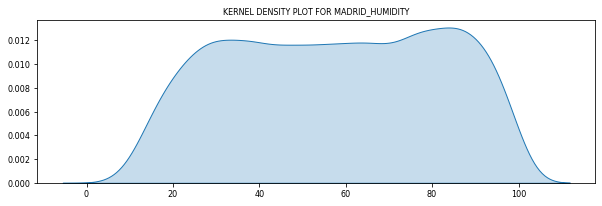

In [88]:
cd.plot_kde(df_train, x_axis = 'madrid_humidity',  plot_title = 'kernel density plot for madrid_humidity',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

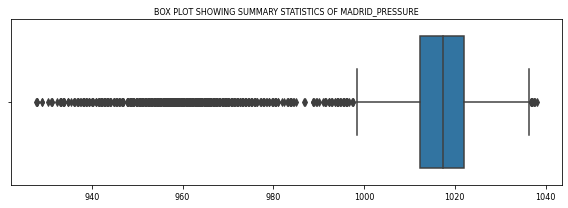

In [89]:
cd.plot_boxplot(df_train, x_axis = 'madrid_pressure', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_pressure", tick_fontsize = 8)

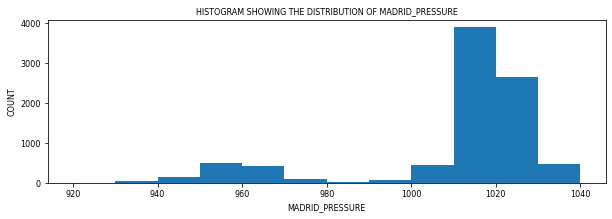

In [90]:
cd.plt_plot_hist(df_train, 'madrid_pressure', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_pressure", x_label = 'madrid_pressure',  
                 bin_edge = 920, y_label ='count')

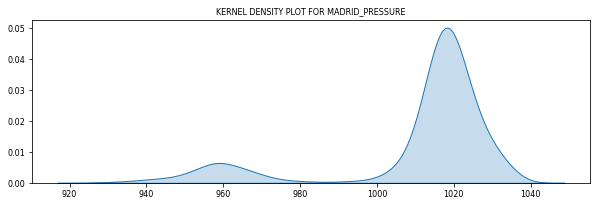

In [91]:
cd.plot_kde(df_train, x_axis = 'madrid_pressure',  plot_title = 'kernel density plot for madrid_pressure',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

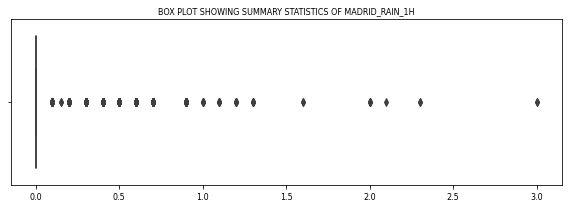

In [92]:
cd.plot_boxplot(df_train, x_axis = 'madrid_rain_1h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_rain_1h", tick_fontsize = 8)

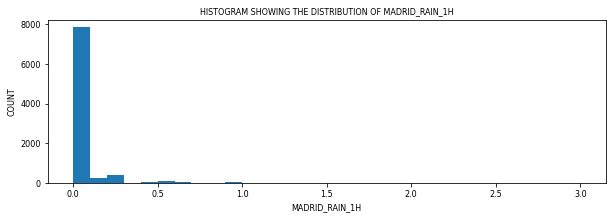

In [93]:
cd.plt_plot_hist(df_train, 'madrid_rain_1h', bin_num = 0.1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_rain_1h", x_label = 'madrid_rain_1h',  
                 bin_edge = 0, y_label ='count')

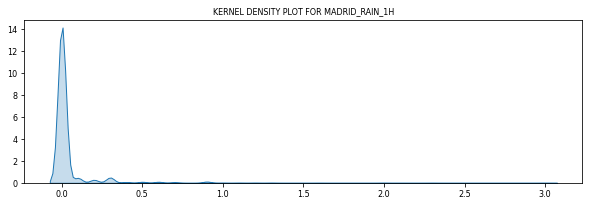

In [94]:
cd.plot_kde(df_train, x_axis = 'madrid_rain_1h',  plot_title = 'kernel density plot for madrid_rain_1h',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

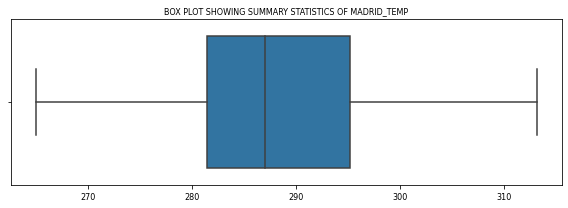

In [95]:
cd.plot_boxplot(df_train, x_axis = 'madrid_temp', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_temp", tick_fontsize = 8)

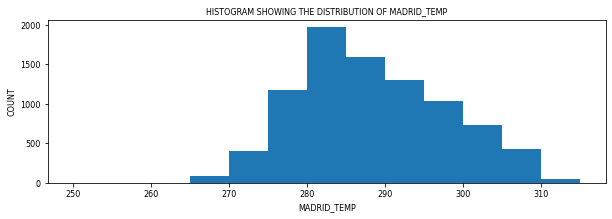

In [96]:
cd.plt_plot_hist(df_train, 'madrid_temp', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_temp", x_label = 'madrid_temp',  
                 bin_edge =250, y_label ='count')

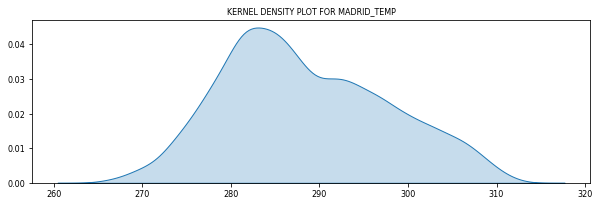

In [97]:
cd.plot_kde(df_train, x_axis = 'madrid_temp',  plot_title = 'kernel density plot for madrid_temp',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

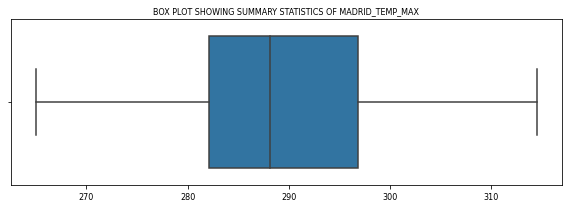

In [98]:
cd.plot_boxplot(df_train, x_axis = 'madrid_temp_max', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_temp_max", tick_fontsize = 8)

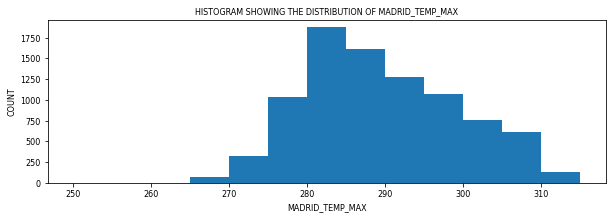

In [99]:
cd.plt_plot_hist(df_train, 'madrid_temp_max', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_temp_max", x_label = 'madrid_temp_max',  
                 bin_edge = 250, y_label ='count')

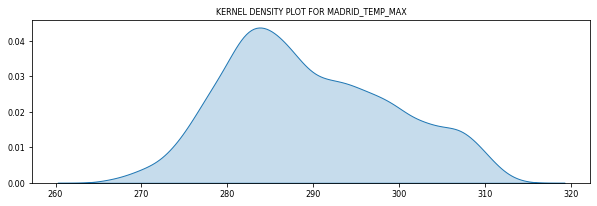

In [100]:
cd.plot_kde(df_train, x_axis = 'madrid_temp_max',  plot_title = 'kernel density plot for madrid_temp_max',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

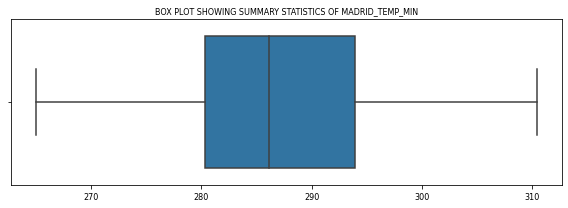

In [101]:
cd.plot_boxplot(df_train, x_axis = 'madrid_temp_min', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_temp_min", tick_fontsize = 8)

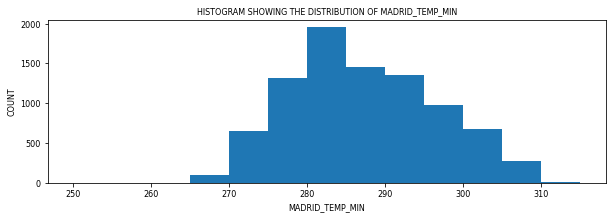

In [102]:
cd.plt_plot_hist(df_train, 'madrid_temp_min', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_temp_min", x_label = 'madrid_temp_min',  
                 bin_edge = 250, y_label ='count')

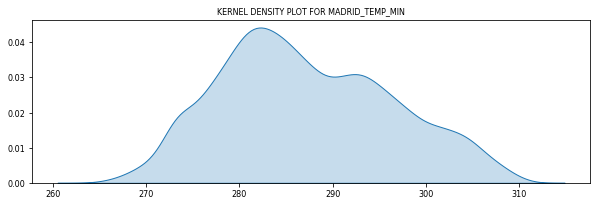

In [103]:
cd.plot_kde(df_train, x_axis = 'madrid_temp_min',  plot_title = 'kernel density plot for madrid_temp_min',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

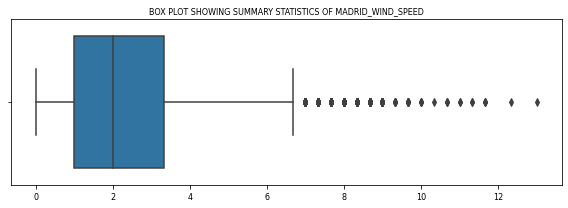

In [104]:
cd.plot_boxplot(df_train, x_axis = 'madrid_wind_speed', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of madrid_wind_speed", tick_fontsize = 8)

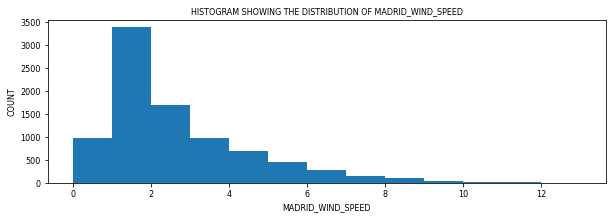

In [105]:
cd.plt_plot_hist(df_train, 'madrid_wind_speed', bin_num = 1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of madrid_wind_speed", x_label = 'madrid_wind_speed',  
                 bin_edge = 0, y_label ='count')

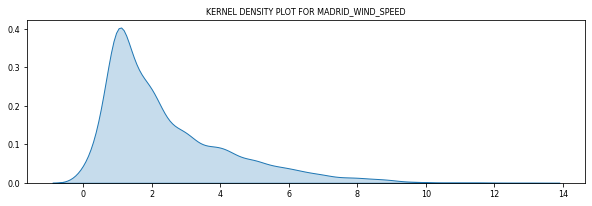

In [106]:
cd.plot_kde(df_train, x_axis = 'madrid_wind_speed',  plot_title = 'kernel density plot for madrid_wind_speed',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

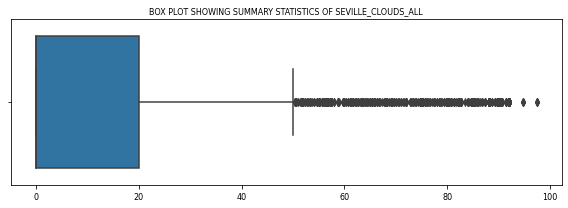

In [107]:
cd.plot_boxplot(df_train, x_axis = 'seville_clouds_all', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_clouds_all", tick_fontsize = 8)

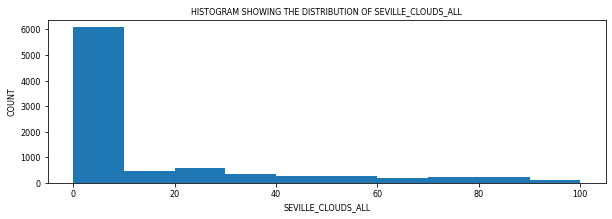

In [108]:
cd.plt_plot_hist(df_train, 'seville_clouds_all', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_clouds_all", x_label = 'seville_clouds_all',  
                 bin_edge = 0, y_label ='count')

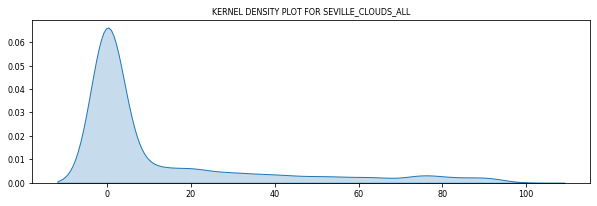

In [109]:
cd.plot_kde(df_train, x_axis = 'seville_clouds_all',  plot_title = 'kernel density plot for seville_clouds_all',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

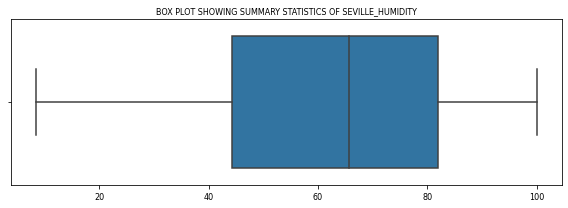

In [110]:
cd.plot_boxplot(df_train, x_axis = 'seville_humidity', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_humidity", tick_fontsize = 8)

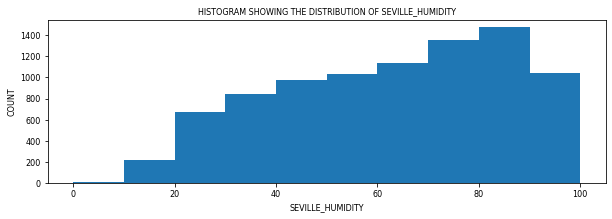

In [111]:
cd.plt_plot_hist(df_train, 'seville_humidity', bin_num = 10, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_humidity", x_label = 'seville_humidity',  
                 bin_edge = 0, y_label ='count')

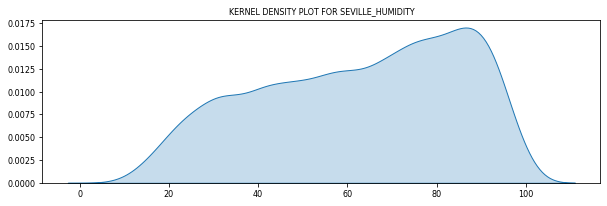

In [112]:
cd.plot_kde(df_train, x_axis = 'seville_humidity',  plot_title = 'kernel density plot for seville_humidity',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

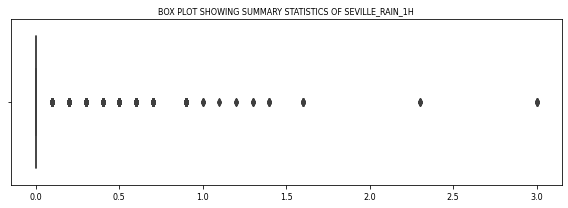

In [113]:
cd.plot_boxplot(df_train, x_axis = 'seville_rain_1h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_rain_1h", tick_fontsize = 8)

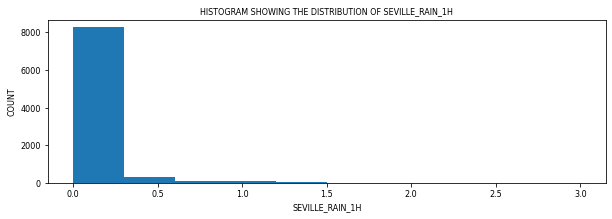

In [114]:
cd.plt_plot_hist(df_train, 'seville_rain_1h', bin_num = 0.3, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_rain_1h", x_label = 'seville_rain_1h',  
                 bin_edge = 0, y_label ='count')

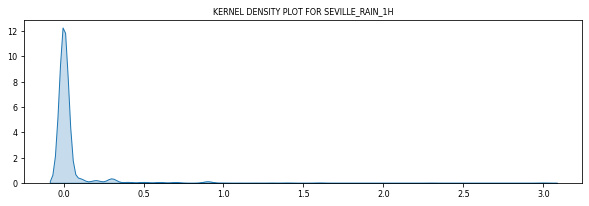

In [115]:
cd.plot_kde(df_train, x_axis = 'seville_rain_1h',  plot_title = 'kernel density plot for seville_rain_1h',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

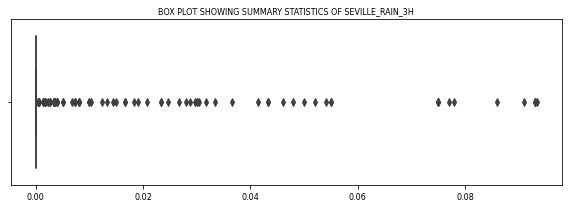

In [116]:
cd.plot_boxplot(df_train, x_axis = 'seville_rain_3h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_rain_3h", tick_fontsize = 8)

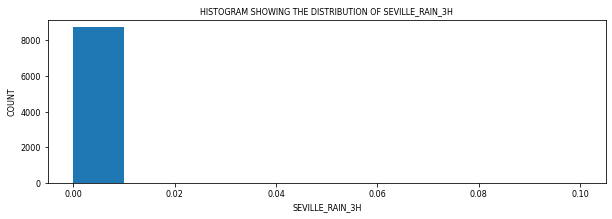

In [117]:
cd.plt_plot_hist(df_train, 'seville_rain_3h', bin_num = 0.01, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_rain_3h", x_label = 'seville_rain_3h',  
                 bin_edge = 0, y_label ='count')

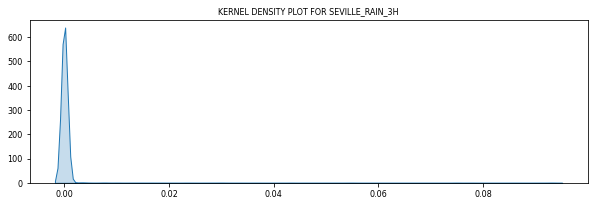

In [118]:
cd.plot_kde(df_train, x_axis = 'seville_rain_3h',  plot_title = 'kernel density plot for seville_rain_3h',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

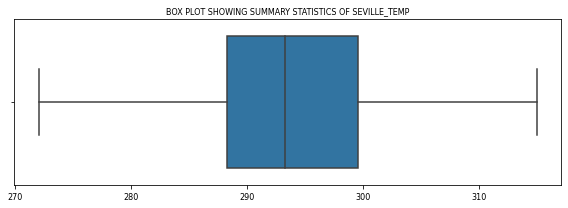

In [119]:
cd.plot_boxplot(df_train, x_axis = 'seville_temp', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_temp", tick_fontsize = 8)

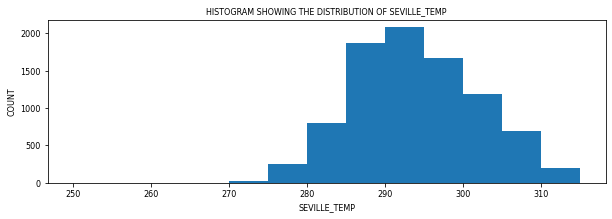

In [120]:
cd.plt_plot_hist(df_train, 'seville_temp', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_temp", x_label = 'seville_temp',  
                 bin_edge = 250, y_label ='count')

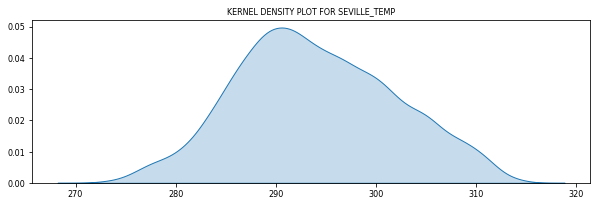

In [121]:
cd.plot_kde(df_train, x_axis = 'seville_temp',  plot_title = 'kernel density plot for seville_temp',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

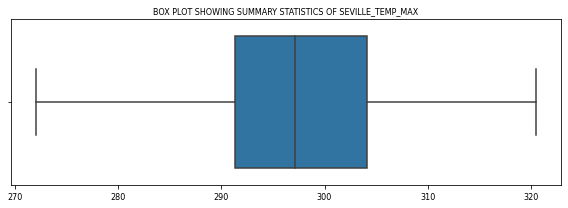

In [122]:
cd.plot_boxplot(df_train, x_axis = 'seville_temp_max', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_temp_max", tick_fontsize = 8)

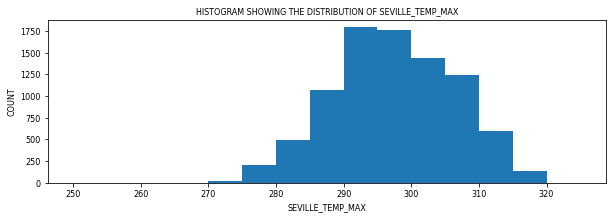

In [123]:
cd.plt_plot_hist(df_train, 'seville_temp_max', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_temp_max", x_label = 'seville_temp_max',  
                 bin_edge = 250, y_label ='count')

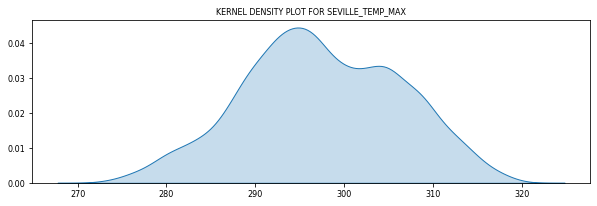

In [124]:
cd.plot_kde(df_train, x_axis = 'seville_temp_max',  plot_title = 'kernel density plot for seville_temp_max',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

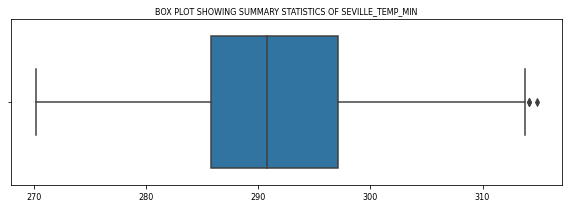

In [125]:
cd.plot_boxplot(df_train, x_axis = 'seville_temp_min', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_temp_min", tick_fontsize = 8)

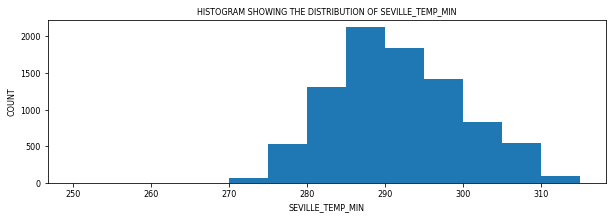

In [126]:
cd.plt_plot_hist(df_train, 'seville_temp_min', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_temp_min", x_label = 'seville_temp_min',  
                 bin_edge = 250, y_label ='count')

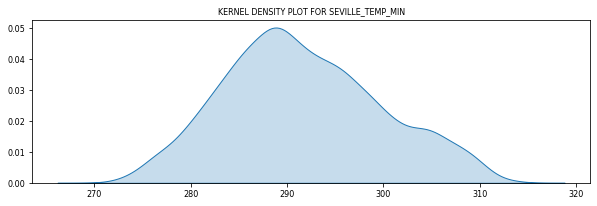

In [127]:
cd.plot_kde(df_train, x_axis = 'seville_temp_min',  plot_title = 'kernel density plot for seville_temp_min',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

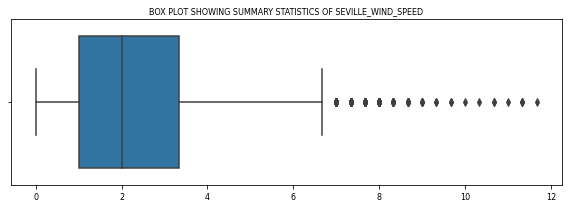

In [128]:
cd.plot_boxplot(df_train, x_axis = 'seville_wind_speed', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of seville_wind_speed", tick_fontsize = 8)

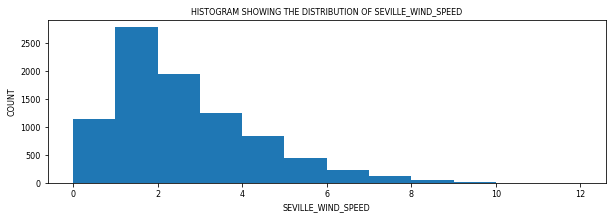

In [129]:
cd.plt_plot_hist(df_train, 'seville_wind_speed', bin_num = 1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of seville_wind_speed", x_label = 'seville_wind_speed',  
                 bin_edge = 0, y_label ='count')

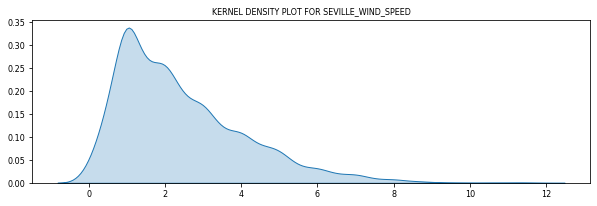

In [130]:
cd.plot_kde(df_train, x_axis = 'seville_wind_speed',  plot_title = 'kernel density plot for seville_wind_speed',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

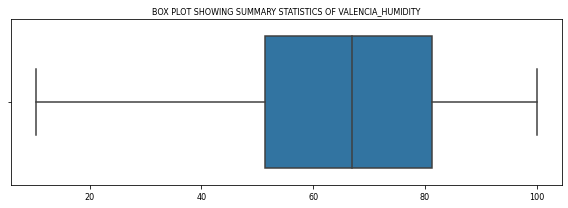

In [131]:
cd.plot_boxplot(df_train, x_axis = 'valencia_humidity', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_humidity", tick_fontsize = 8)

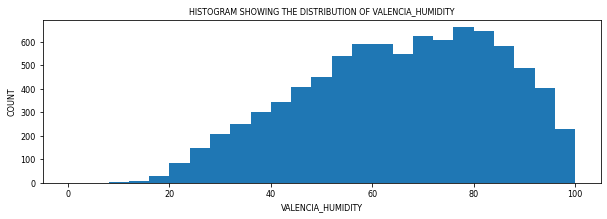

In [132]:
cd.plt_plot_hist(df_train, 'valencia_humidity', bin_num = 4, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of valencia_humidity", x_label = 'valencia_humidity',  
                 bin_edge = 0, y_label ='count')

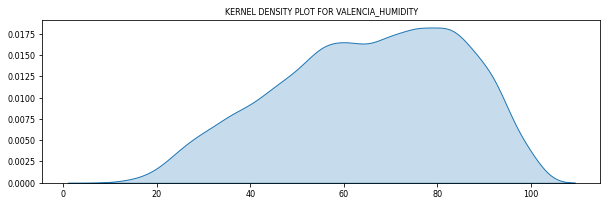

In [133]:
cd.plot_kde(df_train, x_axis = 'valencia_humidity',  plot_title = 'kernel density plot for valencia_humidity',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

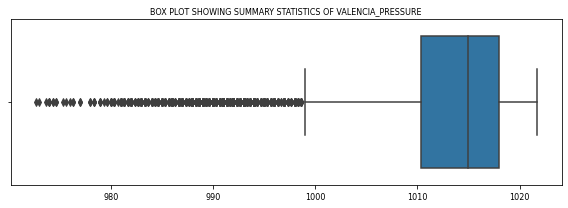

In [134]:
cd.plot_boxplot(df_train, x_axis = 'valencia_pressure', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_pressure", tick_fontsize = 8)

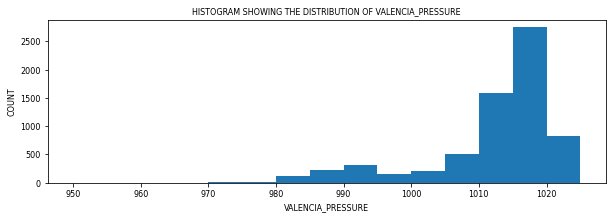

In [135]:
cd.plt_plot_hist(df_train, 'valencia_pressure', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of valencia_pressure", x_label = 'valencia_pressure',  
                 bin_edge = 950, y_label ='count')

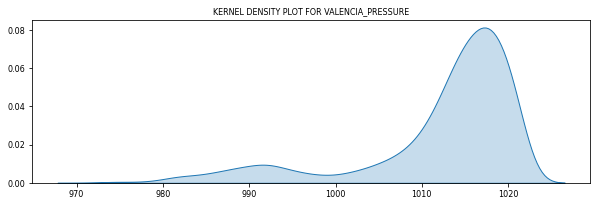

In [136]:
cd.plot_kde(df_train, x_axis = 'valencia_pressure',  plot_title = 'kernel density plot for valencia_pressure',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

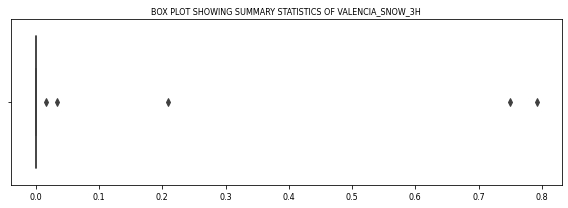

In [137]:
cd.plot_boxplot(df_train, x_axis = 'valencia_snow_3h', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_snow_3h", tick_fontsize = 8)

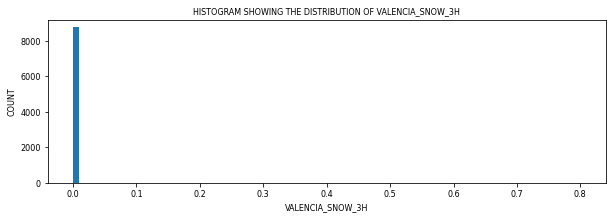

In [138]:
cd.plt_plot_hist(df_train, 'valencia_snow_3h', plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of valencia_snow_3h", x_label = 'valencia_snow_3h',  
                 bin_edge = 0, bin_num = 0.01, y_label ='count')

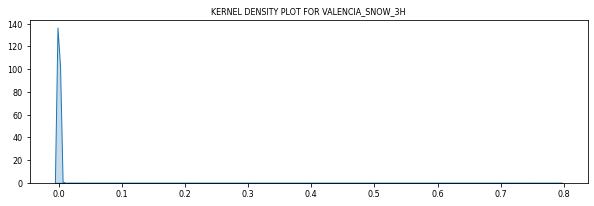

In [139]:
cd.plot_kde(df_train, x_axis = 'valencia_snow_3h',  plot_title = 'kernel density plot for valencia_snow_3h',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

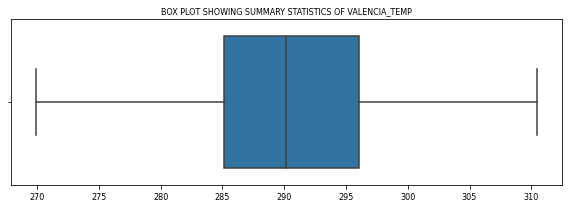

In [140]:
cd.plot_boxplot(df_train, x_axis = 'valencia_temp', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_temp", tick_fontsize = 8)

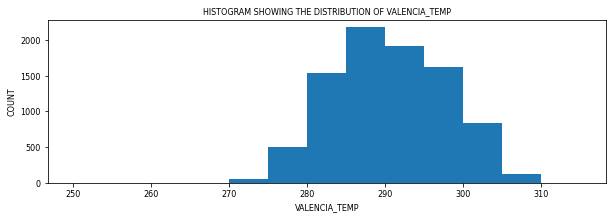

In [141]:
cd.plt_plot_hist(df_train, 'valencia_temp', bin_num = 5, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of valencia_temp", x_label = 'valencia_temp',  
                 bin_edge = 250, y_label ='count')

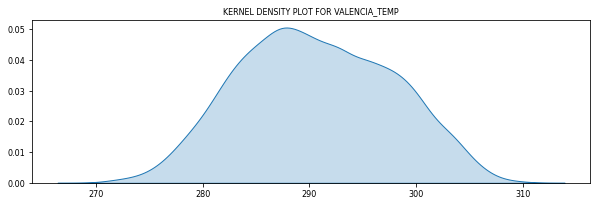

In [142]:
cd.plot_kde(df_train, x_axis = 'valencia_temp',  plot_title = 'kernel density plot for valencia_temp',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

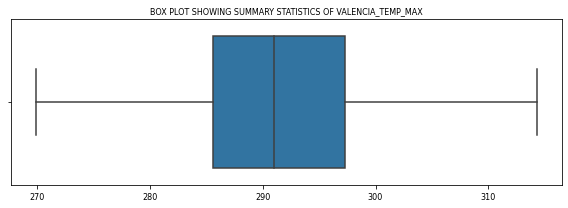

In [143]:
cd.plot_boxplot(df_train, x_axis = 'valencia_temp_max', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_temp_max", tick_fontsize = 8)

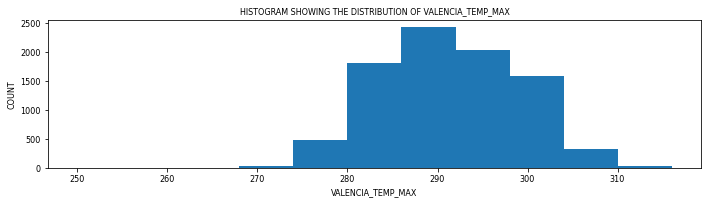

In [195]:
cd.plt_plot_hist(df_train, 'valencia_temp_max', bin_num = 6, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of valencia_temp_max", x_label = 'valencia_temp_max',  
                 bin_edge = 250, y_label ='count')

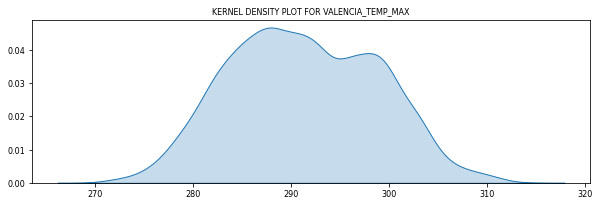

In [145]:
cd.plot_kde(df_train, x_axis = 'valencia_temp_max',  plot_title = 'kernel density plot for valencia_temp_max',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

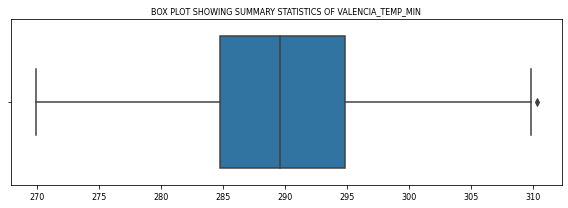

In [146]:
cd.plot_boxplot(df_train, x_axis = 'valencia_temp_min', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_temp_min", tick_fontsize = 8)

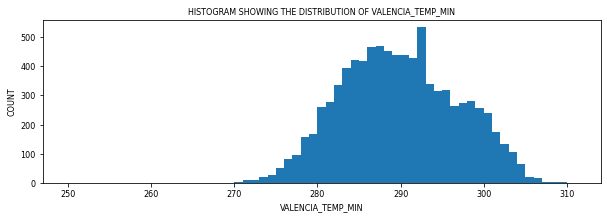

In [147]:
cd.plt_plot_hist(df_train, 'valencia_temp_min', bin_num = 1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of valencia_temp_min", x_label = 'valencia_temp_min',  
                 bin_edge = 250, y_label ='count')

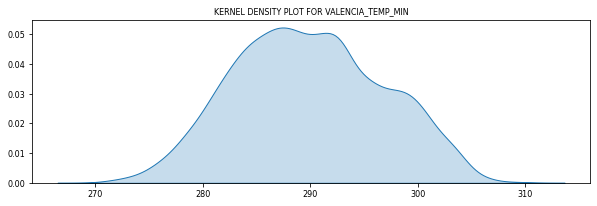

In [148]:
cd.plot_kde(df_train, x_axis = 'valencia_temp_min',  plot_title = 'kernel density plot for valencia_temp_min',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

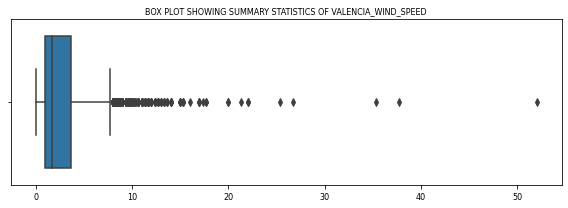

In [149]:
cd.plot_boxplot(df_train, x_axis = 'valencia_wind_speed', univariate = True, plot_figsize =(8,3), plot_fontsize =8, 
                plot_title = "box plot showing summary statistics of valencia_wind_speed", tick_fontsize = 8)

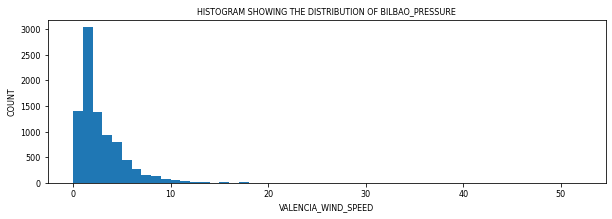

In [150]:
cd.plt_plot_hist(df_train, 'valencia_wind_speed', bin_num = 1, plot_figsize =(10,3), plot_fontsize = 8, tick_fontsize = 8,
                plot_title ="histogram showing the distribution of bilbao_pressure", x_label = 'valencia_wind_speed',  
                 bin_edge = 0, y_label ='count')

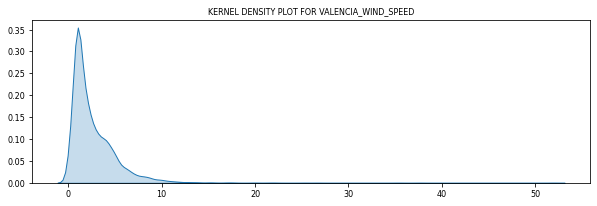

In [151]:
cd.plot_kde(df_train, x_axis = 'valencia_wind_speed',  plot_title = 'kernel density plot for valencia_wind_speed',
         should_fill = True, plot_fontsize = 8, tick_fontsize = 8, plot_figsize =(10,3))

In [152]:
['seville_pressure', 'time', 'valencia_wind_deg']

['seville_pressure', 'time', 'valencia_wind_deg']

In [153]:
seville_order = df_train['seville_pressure'].value_counts().index

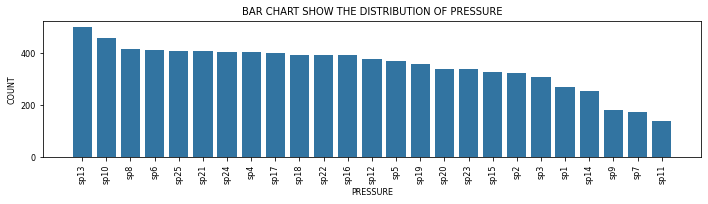

In [154]:
cd.plot_count(df_train, x_axis = 'seville_pressure', x_label = 'pressure', y_label='count', plot_figsize =(10,3),
             plot_title = 'bar chart show the distribution of pressure', plot_fontsize = 8, plot_color = cd.dark_blue,
             tick_rotation = 90, plot_title_fontsize = 10, plot_order = seville_order, tick_fontsize = 8)

In [155]:
valencia_order = df_train['valencia_wind_deg'].value_counts().index

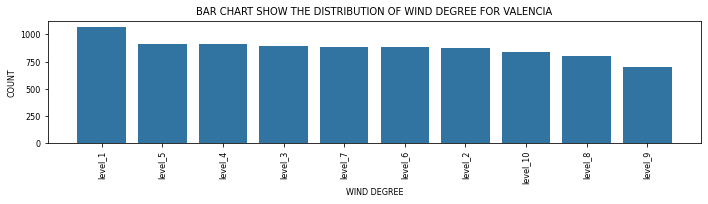

In [156]:
cd.plot_count(df_train, x_axis = 'valencia_wind_deg', x_label = 'wind degree', y_label='count', plot_figsize =(10,3),
             plot_title = 'bar chart show the distribution of wind degree for valencia', plot_fontsize = 8, 
              plot_color = cd.dark_blue, tick_rotation = 90, plot_title_fontsize = 10, plot_order = valencia_order, 
              tick_fontsize = 8)

<a id="three"></a>
## 4. Data Cleaning Operations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning and transformation ⚡ |
| :--------------------------- |
| In this section, you are required to perform cleaning of the variables in the DataFrame. |

---


remove outliers

In [157]:
columns_with_outliers =['madrid_wind_speed', 'valencia_wind_speed', 'seville_humidity', 'madrid_humidity', 
                'bilbao_clouds_all', 'bilbao_wind_speed', 'seville_clouds_all', 'barcelona_wind_speed', 'madrid_clouds_all',
                'seville_wind_speed', 'bilbao_snow_3h', 'valencia_snow_3h', 'seville_temp_max', 'valencia_temp_max', 
                'valencia_temp', 'seville_temp', 'valencia_humidity', 'valencia_temp_min', 'barcelona_temp_max', 
                'madrid_temp_max', 'barcelona_temp', 'bilbao_temp_min', 'bilbao_temp', 'barcelona_temp_min', 
                'bilbao_temp_max', 'seville_temp_min', 'madrid_temp', 'madrid_temp_min', 'barcelona_wind_deg', 
                'barcelona_pressure', 'bilbao_pressure', 'bilbao_wind_deg', 'madrid_pressure', 'valencia_pressure',]

In [158]:
for columns in columns_with_outliers:
    cd.outliers(df_train, columns)

In [159]:
#fill null values for valencia pressure in the train dataset with mean
df_train['valencia_pressure'].fillna(df_train['valencia_pressure'].mean(), inplace = True)
#fill null values for valencia pressure in the test dataset with mean
df_test['valencia_pressure'].fillna(df_test['valencia_pressure'].mean(), inplace = True)

In [160]:
#change the 'time' column's datatype for the train dataset
df_train['time'] = df_train['time'].astype('datetime64[ns]')
df_test['time'] = df_train['time'].astype('datetime64[ns]')

In [197]:
# Drop Unamed column for the train dataset
df_test.drop(['unnamed: 0'], axis = 1, inplace = True)
df_train.drop(['unnamed: 0'], axis = 1, inplace = True)
df_test.drop(['barcelona_weather_id', 'bilbao_weather_id', 'madrid_weather_id', 'seville_weather_id'], axis = 1, inplace = True)
df_train.drop(['barcelona_weather_id', 'bilbao_weather_id', 'madrid_weather_id', 'seville_weather_id'], axis = 1, inplace = True)

In [162]:
#Define classes for the various wind degrees
classes = {
    "level_1" : [0,36],
    "level_2" : [36,72],
    "level_3" : [72,108],
    "level_4" : [108,144],
    "level_5" : [144,180],
    "level_6" : [180,216],
    "level_7" : [216,252],
    "level_8" : [252,288],
    "level_9" : [288,324],
    "level_10" : [324,360]
}

In [163]:
cd.change_levels(df_train, "barcelona_wind_deg", classes)

In [164]:
cd.change_levels(df_train, "bilbao_wind_deg", classes)

In [165]:
df_train['bilbao_wind_deg'].value_counts()

level_10    1676
level_4     1106
level_3     1061
level_2     1014
level_9      973
level_5      924
level_6      891
level_7      725
level_8      390
level_1        3
Name: bilbao_wind_deg, dtype: int64

In [166]:
#Define the classes for the pressures 
levels = cd.np.arange(950, 1050 +1, 4)

In [167]:
#create an empty dictionary
pressure_dict = {}

In [168]:
for i in range(len(levels) - 1):
    pressure_dict['sp' + str(i+1)] = [levels[i], levels[i+1]]

In [169]:
#change the values for all the pressure columns in the train dataset to their respective categories
for column in df_train[[x for x in df_train.columns if 'pressure' in x and 'seville' not in x]].columns:
    cd.change_levels(df_train, column, pressure_dict)

In [170]:
#change the values for all the pressure columns in the test dataset to their respective categories
for column in df_test[[x for x in df_test.columns if 'pressure' in x and 'seville' not in x]].columns:
    cd.change_levels(df_test, column, pressure_dict)

In [171]:
df_test['madrid_pressure'].value_counts()

sp17     834
sp18     631
sp16     360
sp19     342
sp15     188
sp20     176
sp14     118
sp21      90
sp13      87
sp12      32
sp11      16
sp2       13
sp22       6
sp10       6
sp9        4
sp7        4
sp4        3
943.0      3
sp6        2
sp25       2
sp3        1
946.0      1
945.0      1
Name: madrid_pressure, dtype: int64

In [193]:
df_train['bilbao_pressure'].value_counts()

sp18    1862
sp19    1622
sp17    1454
sp16     940
sp20     716
sp15     491
sp12     436
sp21     402
sp13     303
sp14     295
sp22     195
sp23      47
Name: bilbao_pressure, dtype: int64

In [173]:
[x for x in df_train.columns if 'pressure' in x and 'seville' not in x]

['barcelona_pressure',
 'bilbao_pressure',
 'valencia_pressure',
 'madrid_pressure']

In [174]:
snow_3h_train = df_train[[x for x in df_train.columns if 'snow_3h' in x]]

In [175]:
snow_3h_test = df_test[[x for x in df_test.columns if 'snow_3h' in x]]

In [191]:
# look at data statistics

,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333
seville_clouds_all,0.0,0.0,0.0,0.0,0.0


In [177]:
# plot relevant feature interactions

In [229]:
barcelona_train_data = df_train[['barcelona_wind_speed', 'barcelona_wind_deg', 'barcelona_rain_1h', 'barcelona_pressure',
                    'barcelona_rain_3h', 'barcelona_temp_max', 'barcelona_temp',
                    'barcelona_temp_min']]
barcelona_train_data.corr()

,barcelona_wind_speed,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp_max,barcelona_temp,barcelona_temp_min
barcelona_wind_speed,1.000000,0.043641,-0.001624,0.121675,0.122613,0.114087
barcelona_rain_1h,0.043641,1.000000,-0.020084,0.083289,0.060384,0.023573
barcelona_rain_3h,-0.001624,-0.020084,1.000000,-0.051366,-0.042970,-0.029412
barcelona_temp_max,0.121675,0.083289,-0.051366,1.000000,0.974481,0.885927
barcelona_temp,0.122613,0.060384,-0.042970,0.974481,1.000000,0.964094
barcelona_temp_min,0.114087,0.023573,-0.029412,0.885927,0.964094,1.000000


In [178]:
# evaluate correlation

In [210]:
df_train.corr()

,madrid_wind_speed,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,seville_clouds_all,barcelona_wind_speed,madrid_clouds_all,...,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min,load_shortfall_3h
madrid_wind_speed,1.000000,0.262217,0.521787,-0.127461,-0.151845,0.247805,0.361525,0.193932,0.286688,0.227737,...,0.105661,0.090302,0.090164,0.071964,0.099399,0.051324,0.122985,0.125022,0.114033,-0.149546
bilbao_rain_1h,0.262217,1.000000,0.222019,0.069878,0.106765,0.370733,0.084546,0.080009,0.068451,0.133462,...,-0.148397,-0.138901,-0.141379,-0.182851,-0.106641,-0.221345,-0.120574,-0.135927,-0.116431,-0.152510
valencia_wind_speed,0.521787,0.222019,1.000000,-0.121893,-0.056376,0.216604,0.416334,0.153942,0.383729,0.215666,...,0.004489,0.004416,0.017657,0.006793,0.026098,-0.003961,0.034670,0.015785,0.004916,-0.135941
seville_humidity,-0.127461,0.069878,-0.121893,1.000000,0.799831,0.061680,-0.111722,0.408963,-0.149927,0.365918,...,-0.708937,-0.617797,-0.605940,-0.605293,-0.595261,-0.584753,-0.784851,-0.717171,-0.688664,-0.167290
madrid_humidity,-0.151845,0.106765,-0.056376,0.799831,1.000000,0.041878,-0.032699,0.388533,-0.068280,0.483875,...,-0.803260,-0.684867,-0.636288,-0.635600,-0.636930,-0.613364,-0.769595,-0.802605,-0.759633,-0.150536
bilbao_clouds_all,0.247805,0.370733,0.216604,0.061680,0.041878,1.000000,0.027721,0.047732,0.089882,0.108725,...,-0.048491,-0.023171,-0.066826,-0.112803,-0.010782,-0.155363,-0.077428,-0.046686,-0.046189,-0.127293
bilbao_wind_speed,0.361525,0.084546,0.416334,-0.111722,-0.032699,0.027721,1.000000,0.129993,0.285256,0.237213,...,0.043500,0.036309,0.127858,0.163937,0.041157,0.198365,0.076561,0.050106,0.039912,-0.076107
seville_clouds_all,0.193932,0.080009,0.153942,0.408963,0.388533,0.047732,0.129993,1.000000,0.131201,0.570346,...,-0.252604,-0.194010,-0.143915,-0.160092,-0.160564,-0.170613,-0.213105,-0.240797,-0.227504,-0.088292
barcelona_wind_speed,0.286688,0.068451,0.383729,-0.149927,-0.068280,0.089882,0.285256,0.131201,1.000000,0.137932,...,0.093146,0.122613,0.131618,0.128753,0.114087,0.116253,0.139924,0.097777,0.092006,-0.100144
madrid_clouds_all,0.227737,0.133462,0.215666,0.365918,0.483875,0.108725,0.237213,0.570346,0.137932,1.000000,...,-0.279695,-0.224003,-0.166466,-0.172788,-0.189125,-0.170853,-0.245747,-0.263048,-0.246002,-0.082362


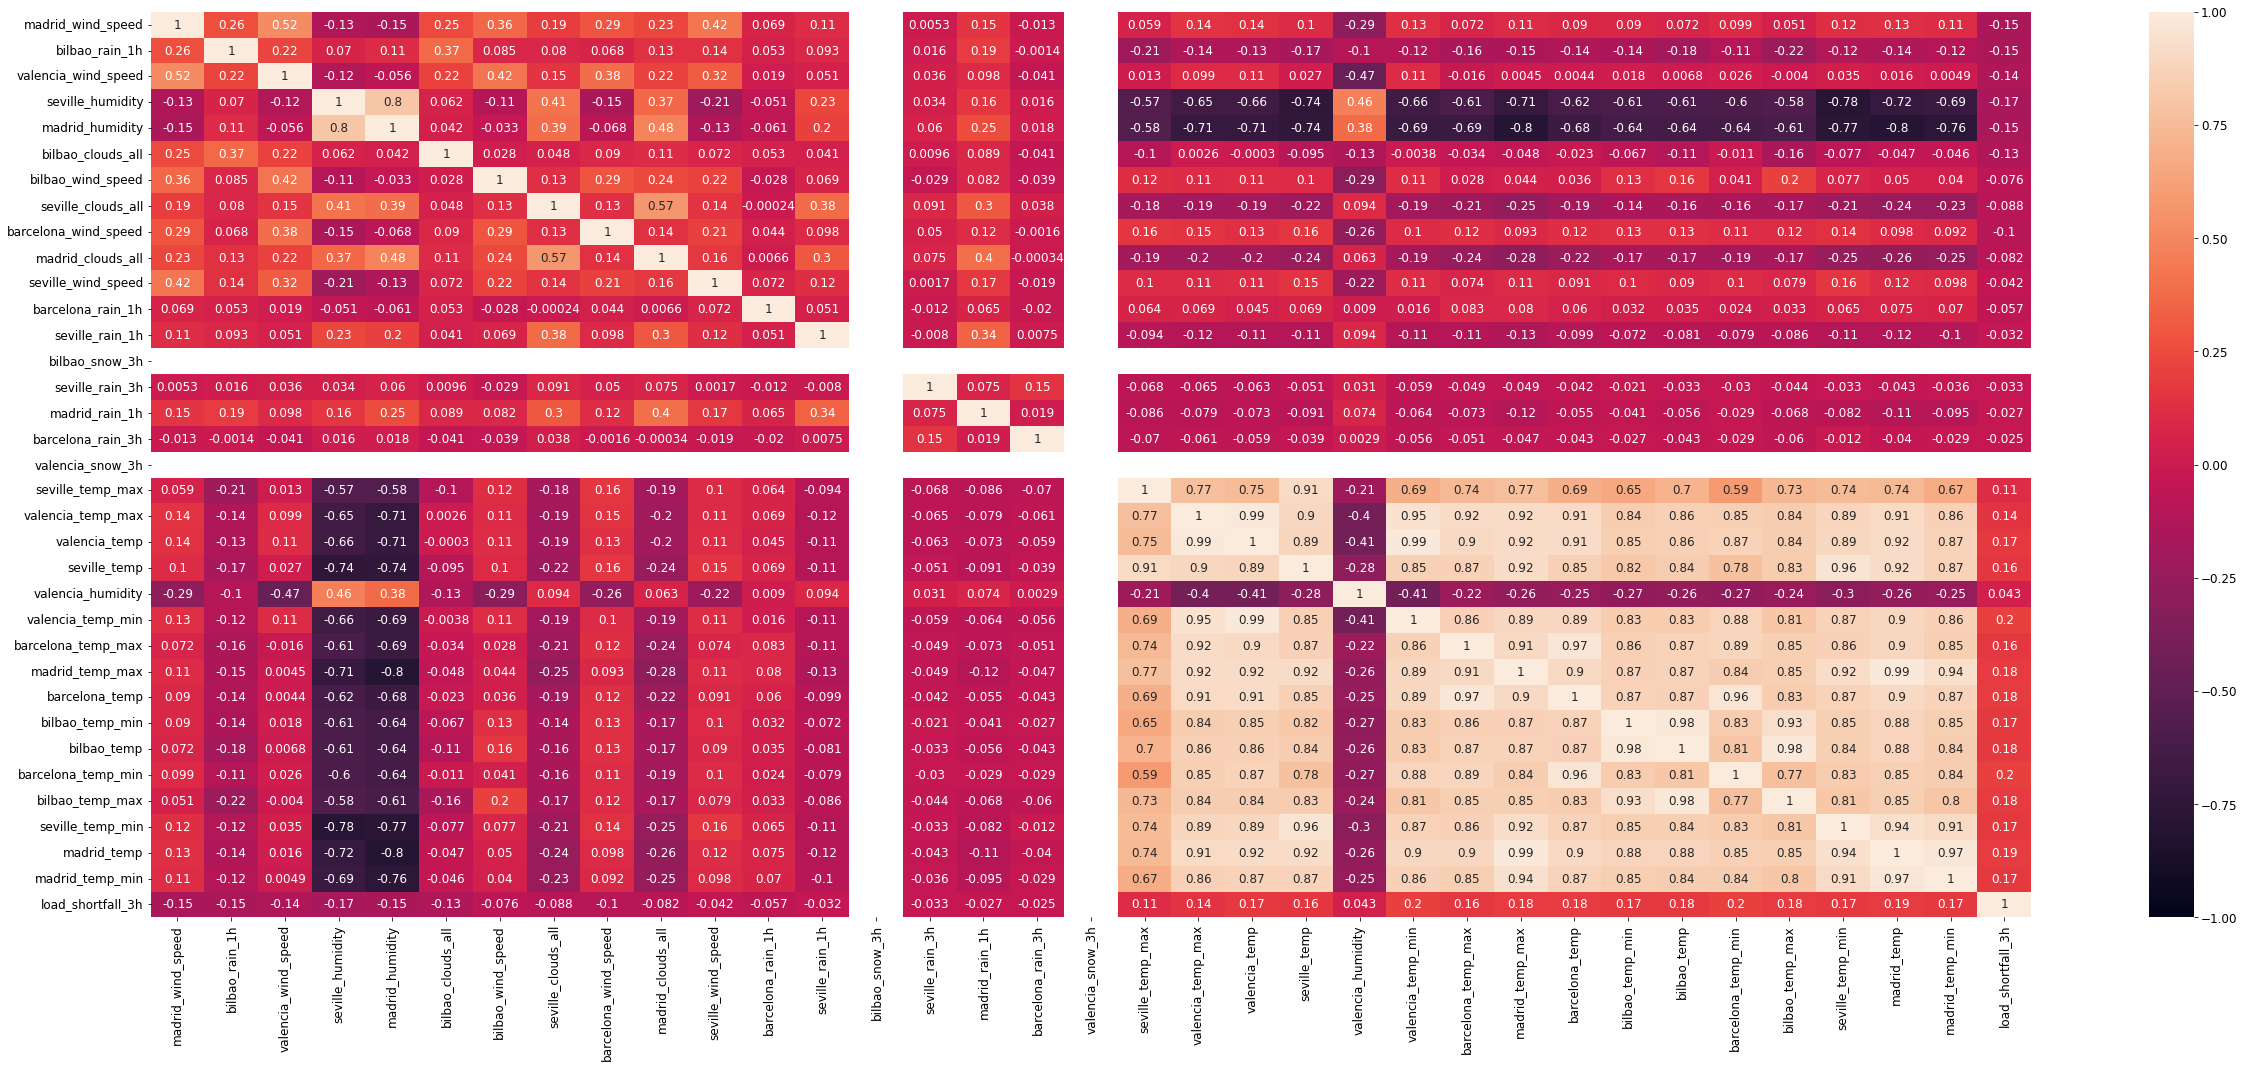

In [204]:
# Visualizing the correlation
cd.plt.figure(figsize=[35,15])
cd.sb.heatmap(df_train.corr(), vmin=-1, vmax=1 ,annot=True);

In [179]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [205]:
df_train.columns

Index(['time', 'madrid_wind_speed', 'valencia_wind_deg', 'bilbao_rain_1h',
       'valencia_wind_speed', 'seville_humidity', 'madrid_humidity',
       'bilbao_clouds_all', 'bilbao_wind_speed', 'seville_clouds_all',
       'bilbao_wind_deg', 'barcelona_wind_speed', 'barcelona_wind_deg',
       'madrid_clouds_all', 'seville_wind_speed', 'barcelona_rain_1h',
       'seville_pressure', 'seville_rain_1h', 'bilbao_snow_3h',
       'barcelona_pressure', 'seville_rain_3h', 'madrid_rain_1h',
       'barcelona_rain_3h', 'valencia_snow_3h', 'bilbao_pressure',
       'valencia_pressure', 'seville_temp_max', 'madrid_pressure',
       'valencia_temp_max', 'valencia_temp', 'seville_temp',
       'valencia_humidity', 'valencia_temp_min', 'barcelona_temp_max',
       'madrid_temp_max', 'barcelona_temp', 'bilbao_temp_min', 'bilbao_temp',
       'barcelona_temp_min', 'bilbao_temp_max', 'seville_temp_min',
       'madrid_temp', 'madrid_temp_min', 'load_shortfall_3h'],
      dtype='object')

In [180]:
# remove missing values/ features

In [181]:
# create new features

In [225]:
#creating dummies for the pressure columns
seville_pressure_dummy = cd.pd.get_dummies(df_train['seville_pressure'])
barcelona_pressure_dummy = cd.pd.get_dummies(df_train['barcelona_pressure'])
bilbao_pressure_dummy = cd.pd.get_dummies(df_train['bilbao_pressure'])
madrid_pressure_dummy = cd.pd.get_dummies(df_train['madrid_pressure'])
valencia_pressure_dummy = cd.pd.get_dummies(df_train['valencia_pressure'])
seville_pressure_dummy

,sp1,sp10,sp11,sp12,sp13,sp14,sp15,sp16,sp17,sp18,...,sp23,sp24,sp25,sp3,sp4,sp5,sp6,sp7,sp8,sp9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8759,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8761,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#checking dummy df for duplicates
seville_pressure_dummy['check'] = seville_pressure_dummy.sum(axis=1)
barcelona_pressure_dummy['check'] = barcelona_pressure_dummy.sum(axis=1)
bilbao_pressure_dummy['check'] = bilbao_pressure_dummy.sum(axis=1)
madrid_pressure_dummy['check'] = madrid_pressure_dummy.sum(axis=1)
valencia_pressure_dummy['check'] = valencia_pressure_dummy.sum(axis=1)

In [182]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [183]:
# split data

In [184]:
# create targets and features dataset

In [185]:
# create one or more ML models

In [186]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [187]:
# Compare model performance

In [188]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [189]:
# discuss chosen methods logic

In [190]:
df_train.to_csv('train_clean.csv', index = False, encoding='utf-8')
df_test.to_csv('test_clean.csv', index = False, encoding='utf-8')